In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
pd.set_option('max.columns', None)

df = pd.read_csv('../data-prep/surfa_combined_dataset.csv')
df.tail()

,Date,Tip,Orders,Distance,DriverID,TipPerOrder,DayOfWeek,IsWeekend,DDVEC,FHVEC,MeanWind,MaxWind,MaxWindHour,MinWind,MinWindHour,MaxWindGust,MaxWindGustHour,MeanTemp,MinTemp,MinTempHour,MaxTemp,MaxTempHour,T10N,T10NH,SunshineDur,SP,Q,RainDur,RainAmount,MaxRainAmount,MaxRainAmountHour,MeanPress,MaxPress,MaxPressHour,MinPress,MinPressHour,MinVis,MinVisHour,MaxVis,MaxVisHour,Cloudness,MeanHum,MaxHum,MaxHumHour,MinHum,MinHumHour,EV24
95,2021-03-11,0.00,7,21.3,3,0.000000,3,0.0,229.0,91.0,96.0,150.0,10.0,40.0,18.0,260.0,10.0,94.0,62.0,20.0,144.0,14.0,57.0,24.0,51.0,44.0,869.0,32.0,62.0,21.0,7.0,9987.0,10040.0,24.0,9952.0,10.0,50.0,2.0,77.0,16.0,8.0,76.0,95.0,7.0,56.0,11.0,13.0
96,2021-03-12,0.00,10,38.8,3,0.000000,4,1.0,223.0,76.0,78.0,110.0,12.0,60.0,4.0,170.0,12.0,69.0,40.0,6.0,94.0,13.0,34.0,6.0,6.0,5.0,455.0,20.0,48.0,43.0,15.0,10044.0,10072.0,7.0,10010.0,24.0,57.0,14.0,77.0,13.0,7.0,77.0,86.0,15.0,64.0,13.0,6.0
97,2021-03-13,0.00,10,40.6,3,0.000000,5,1.0,236.0,78.0,84.0,110.0,7.0,50.0,22.0,230.0,12.0,66.0,41.0,23.0,96.0,16.0,34.0,24.0,40.0,34.0,623.0,84.0,129.0,19.0,9.0,9961.0,10022.0,24.0,9917.0,6.0,39.0,9.0,83.0,17.0,7.0,79.0,93.0,2.0,56.0,16.0,8.0
98,2021-03-14,3.32,9,27.0,3,0.368889,6,1.0,248.0,46.0,49.0,80.0,14.0,20.0,20.0,130.0,14.0,56.0,31.0,5.0,99.0,14.0,26.0,6.0,41.0,35.0,867.0,56.0,62.0,20.0,19.0,10098.0,10136.0,19.0,10031.0,1.0,50.0,24.0,78.0,15.0,7.0,84.0,96.0,20.0,63.0,15.0,11.0
99,2021-03-17,1.22,10,24.1,3,0.122000,2,0.0,340.0,36.0,38.0,60.0,12.0,20.0,2.0,120.0,14.0,47.0,17.0,24.0,73.0,14.0,9.0,24.0,17.0,14.0,620.0,20.0,19.0,5.0,10.0,10268.0,10287.0,23.0,10255.0,1.0,18.0,6.0,75.0,11.0,7.0,89.0,98.0,6.0,77.0,17.0,8.0


# Some plotting

In [29]:
import seaborn as sns

I just realized I never looked at the distribuition of tips. And better late than never. Here we see a uniform-ish "ellbow?" distribuition. 

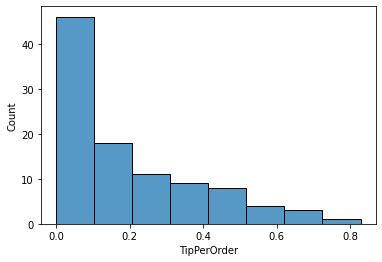

In [4]:

sns.histplot(df, x="TipPerOrder")

In [5]:
# sns.pairplot(df, vars=['DayOfWeek','TipPerOrder'], height=10)

### The evaluation criterion

(It feels like there should be ways to calculate that mathematically, but for now we will set it experimantally)

If we guess all tips at random the r2 score will tend to be -4.4


In [27]:
from sklearn.metrics import r2_score
import numpy as np

sum = 0
for _ in range(0,500):
    sum += r2_score(df['TipPerOrder'], np.random.rand(100))
print(sum/500)

-4.426392733672181


If a human human makes guesses with a probability that matches the distribuition, the r^2 score will be -1.2 which is still worse than guessing average.

In [7]:
from random import choices

binned = pd.cut(df['TipPerOrder'], np.arange(-0.1, 1, 0.1))
binned = binned.apply(lambda x: float(x.right))
tip_distribution = binned.groupby(binned).count()

sum=0
for _ in range(0,500):
    sum += r2_score(df['TipPerOrder'], choices(tip_distribution.index.values, tip_distribution, k=100))
print(sum/500)


-1.2266341998497445


As a result any algorythm with an r2 score of over -1.2 would predict better than a human guess and would be useful.

# Feature selection

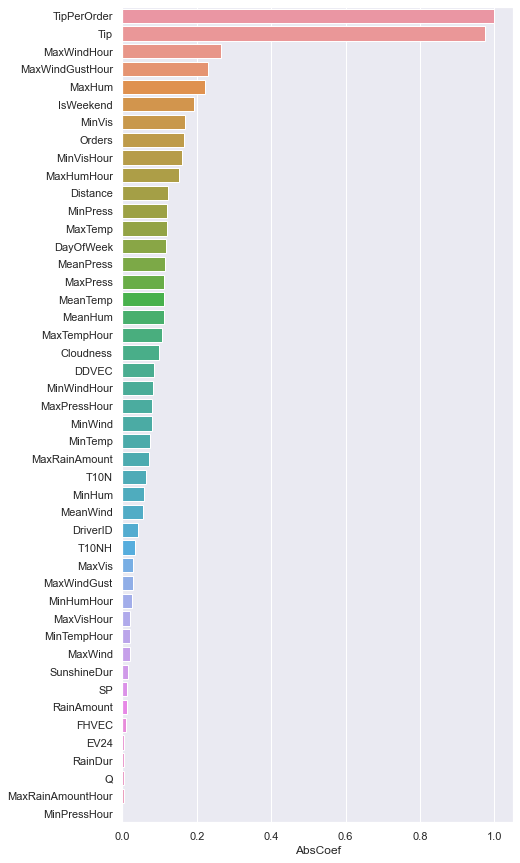

In [30]:
plt.figure(figsize=(7,15))
sns.set(font_scale=1.4)

cofs = df.corr()[['TipPerOrder']]
cofs['AbsCoef'] = cofs['TipPerOrder'].apply(abs)

cofs = cofs.sort_values('AbsCoef', ascending=False)

sns.set_theme()
ax = sns.barplot(data=cofs, x='AbsCoef', y=cofs.index)


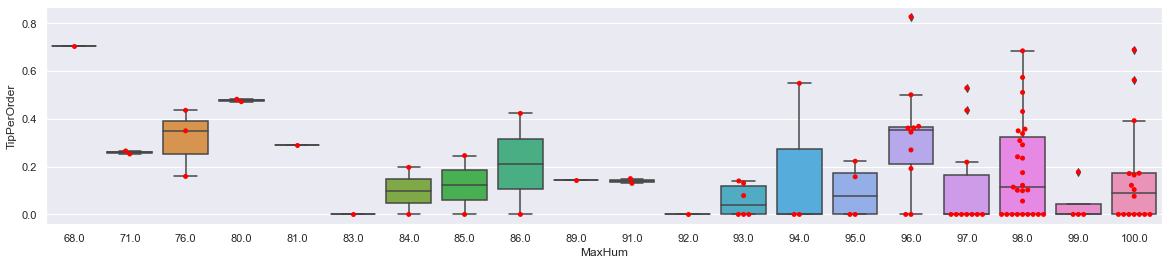

In [31]:
tdf = df.copy()
# plt.figure(figsize=(20,4))
# sns.boxplot(x=tdf['MaxWindHour'], y = tdf['TipPerOrder'],)

tdf['MaxHumBin'] = pd.cut(tdf.MaxHum, range(66,100,2))
# plt.show()


plt.figure(figsize=(20,4))
sns.boxplot(x=tdf['MaxHum'], y = tdf['TipPerOrder'])
sns.swarmplot(x=tdf['MaxHum'], y = tdf['TipPerOrder'], color='red')

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression
pdf = df.drop(['Tip', 'Orders', 'Distance', 'DriverID', 'TipPerOrder', 'Date'], axis = 1)
X = pdf
y = df['TipPerOrder']

In [33]:
selector = SelectKBest(f_regression, k=10).fit(X, y)
pdf.iloc[:,selector.get_support(indices=True)]
X_select = selector.transform(X)

Alright.. so I got the F score and the p value, but I don't know how to interpret those, but lookks like the heigher hte F score – the better.

In [34]:
f_score, p_val = f_regression(pdf, y)

pd.DataFrame({'fscore': f_score, 'pval':p_val}, index=pdf.columns).sort_values('fscore', ascending=False).head(7)

,fscore,pval
MaxWindHour,7.461692,0.007476
MaxWindGustHour,5.552574,0.020444
MaxHum,5.032032,0.027135
IsWeekend,3.805857,0.053930
MinVis,2.870056,0.093418
MinVisHour,2.627534,0.108238
MaxHumHour,2.368187,0.127054


# Predictions

In [35]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [14]:
clf = SVR(kernel='rbf')


clf.fit(df[['IsWeekend', 'MaxWindHour']], df['TipPerOrder'])
y_pred = clf.predict(df[['IsWeekend', 'MaxWindHour']])
print(r2_score(df['TipPerOrder'], y_pred))



0.05925233265354368


This is abysmal.. let's try to make it better.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [ ]:

pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', SVR())
])

parameters = {
    'model__kernel':('linear', 'rbf', 'sigmoid', 'poly'), 
    'model__gamma': ['auto', 'scale', *np.logspace(0, 10, base=2, num=10)] ,
    }   


grid = GridSearchCV(pipe, parameters, cv=5, verbose=2)

grid.fit(X_select, y)



In [17]:
pd.DataFrame(grid.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.002387,0.000807,0.001000,5.722046e-07,1,rbf,"{'model__gamma': 1.0, 'model__kernel': 'rbf'}",-0.352452,0.116058,0.033497,0.029725,0.023273,-0.029980,0.164770,1
13,0.002195,0.000401,0.000628,5.130060e-04,2.16012,rbf,"{'model__gamma': 2.160119477784612, 'model__ke...",-0.329221,0.116155,0.008222,-0.016717,0.015224,-0.041268,0.150958,2
21,0.002600,0.000491,0.000607,4.960438e-04,10.0794,rbf,"{'model__gamma': 10.079368399158986, 'model__k...",-0.324052,0.116456,-0.002924,-0.025239,0.013074,-0.044537,0.147967,3
25,0.002563,0.000537,0.000801,4.006658e-04,21.7726,rbf,"{'model__gamma': 21.772640002790034, 'model__k...",-0.324180,0.116108,-0.002903,-0.025188,0.012953,-0.044642,0.147932,4
33,0.002599,0.000491,0.001198,4.002409e-04,101.594,rbf,"{'model__gamma': 101.59366732596479, 'model__k...",-0.324180,0.115806,-0.002903,-0.025212,0.012989,-0.044700,0.147869,5


The best performance came from an rbf kernel with Gamma of one while sigmoid kernel is so low we will not pursue it anymore.

I wonder why was sigmoid so bad? probably there was a setting i should've tweaked.

And since the default of gamma is  1 / (n_features * X.var()) i think the value of 1000 is way too high for it. I wish someone told me that.

So the docs seem to recomend a log range from 10^-3 to 10^3 

In [18]:
pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', SVR())
])

parameters = [
    {
        'model__kernel':['rbf'], 
        'model__gamma': ['auto', 'scale', 1, *np.logspace(-4, 5, base=2, num=9)] ,
    },{
        'model__kernel': ['poly'],
        'model__gamma': ['auto', 'scale', 1, *np.logspace(-4, 5, base=2, num=9)] ,
    }   
]

grid2 = GridSearchCV(pipe, parameters, cv=5, verbose=1)

grid2.fit(X_select, y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVR())]),
             param_grid=[{'model__gamma': ['auto', 'scale', 1, 0.0625,
                                           0.1363134665831572,
                                           0.29730177875068026,
                                           0.6484197773255048,
                                           1.4142135623730951,
                                           3.0844216508158815,
                                           6.727171322029716, 14.67206469127474,
                                           32.0],
                          'model__kernel': ['rbf']},
                         {'model__gamma': ['auto', 'scale', 1, 0.0625,
                                           0.1363134665831572,
                                           0.29730177875068026,
                                           0.6484197773255048,
                      

In [19]:
pd.DataFrame(grid2.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.002200,0.000981,0.001000,6.031566e-07,1,rbf,"{'model__gamma': 1, 'model__kernel': 'rbf'}",-0.352452,0.116058,0.033497,0.029725,0.023273,-0.029980,0.164770,1
7,0.001799,0.000400,0.000800,4.000684e-04,1.41421,rbf,"{'model__gamma': 1.4142135623730951, 'model__k...",-0.337064,0.116077,0.025416,0.003671,0.019415,-0.034497,0.156315,2
6,0.001597,0.000488,0.000800,3.998776e-04,0.64842,rbf,"{'model__gamma': 0.6484197773255048, 'model__k...",-0.408634,0.119954,0.016908,0.064738,0.023179,-0.036771,0.189538,3
8,0.002000,0.000003,0.000604,4.929770e-04,3.08442,rbf,"{'model__gamma': 3.0844216508158815, 'model__k...",-0.326859,0.116025,-0.000598,-0.023832,0.014079,-0.044237,0.149185,4
10,0.001978,0.000040,0.000998,1.309350e-06,14.6721,rbf,"{'model__gamma': 14.67206469127474, 'model__ke...",-0.323703,0.116107,-0.002903,-0.025172,0.012953,-0.044544,0.147752,5


RBF seems to still be the best fitting kernel by far so we'll focus on it for now.

In [20]:
pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', SVR())
])

parameters = [
    {
        'model__kernel':['poly'], 
        'model__gamma': ['auto', 'scale', 1, *np.logspace(-5, 2, base=10, num=12)] ,
        'model__C': np.logspace(-10, 3, base=10, num=12) ,
    }
]

grid3 = GridSearchCV(pipe, parameters, cv=5, verbose=1)

grid3.fit(X_select, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVR())]),
             param_grid=[{'model__C': array([1.00000000e-10, 1.51991108e-09, 2.31012970e-08, 3.51119173e-07,
       5.33669923e-06, 8.11130831e-05, 1.23284674e-03, 1.87381742e-02,
       2.84803587e-01, 4.32876128e+00, 6.57933225e+01, 1.00000000e+03]),
                          'model__gamma': ['auto', 'scale', 1, 1e-05,
                                           4.328761281083062e-05,
                                           0.0001873817422860383,
                                           0.0008111308307896872,
                                           0.003511191734215131,
                                           0.01519911082952933,
                                           0.06579332246575682,
                                           0.2848035868435799,
                                           1.232846739442066, 5.3366992312063

In [21]:
pd.DataFrame(grid3.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.001804,0.000403,0.000796,0.000399,1e-10,100,poly,"{'model__C': 1e-10, 'model__gamma': 100.0, 'mo...",-0.251936,0.393676,-0.158938,-0.079155,0.126884,0.006106,0.230605,1
77,0.001793,0.000396,0.000801,0.000401,8.11131e-05,1,poly,"{'model__C': 8.111308307896872e-05, 'model__ga...",-0.197068,0.350972,-0.138276,-0.114931,0.117986,0.003737,0.204057,2
129,0.001795,0.000746,0.000802,0.000401,0.284804,0.0657933,poly,"{'model__C': 0.2848035868435805, 'model__gamma...",-0.197068,0.350232,-0.138276,-0.115129,0.118193,0.003590,0.203852,3
172,0.001601,0.000492,0.000800,0.000400,1000,0.00351119,poly,"{'model__C': 1000.0, 'model__gamma': 0.0035111...",-0.047631,0.238931,-0.100863,-0.175443,0.098745,0.002748,0.148340,4
57,0.001999,0.000641,0.000400,0.000490,3.51119e-07,5.3367,poly,"{'model__C': 3.5111917342151345e-07, 'model__g...",-0.099777,0.274361,-0.114304,-0.175084,0.104633,-0.002034,0.167258,5


Interesting, now that we added the C parameter, the poly kernel comes back and crosses the 0 r2_score threshhold. Exciting.

I've heard that random forests are "Surprisingly good", let's see how they perform

In [22]:
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators = 200))
])

parameters = [
    {
    'model__max_depth': [80, 90, 100, 120],
    'model__max_features': [1, 2, 3, 5],
    'model__min_samples_leaf': [3, 5, 6],
    'model__min_samples_split': [2, 5, 8, 10, 12],
    'model__n_estimators': [1,3, 5, 15]
    }
]

grid4 = GridSearchCV(pipe, parameters, cv=5, n_jobs=3, verbose=2)

grid4.fit(X_select, y)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(n_estimators=200))]),
             n_jobs=3,
             param_grid=[{'model__max_depth': [80, 90, 100, 120],
                          'model__max_features': [1, 2, 3, 5],
                          'model__min_samples_leaf': [3, 5, 6],
                          'model__min_samples_split': [2, 5, 8, 10, 12],
                          'model__n_estimators': [1, 3, 5, 15]}],
             verbose=2)

In [23]:
rfdf = pd.DataFrame(grid4.cv_results_).sort_values('mean_test_score', ascending=False)
rfdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
495,0.043614,0.002661,0.005400,0.004318,100,1,3,10,15,"{'model__max_depth': 100, 'model__max_features...",-0.032682,0.325105,0.122341,0.015212,-0.067602,0.072475,0.141610,1
854,0.023998,0.006294,0.002800,0.000749,120,3,3,10,5,"{'model__max_depth': 120, 'model__max_features...",-0.210431,0.215427,0.110563,0.195023,0.048385,0.071794,0.153309,2
306,0.039396,0.013185,0.003600,0.002243,90,2,3,5,5,"{'model__max_depth': 90, 'model__max_features'...",-0.211650,0.230323,0.118671,-0.042288,0.224843,0.063980,0.169589,3
346,0.038397,0.011570,0.003001,0.000894,90,2,6,5,5,"{'model__max_depth': 90, 'model__max_features'...",-0.062388,0.252361,0.042759,-0.027614,0.077068,0.056437,0.109711,4
502,0.013796,0.000747,0.002399,0.000490,100,1,5,2,5,"{'model__max_depth': 100, 'model__max_features...",-0.106873,0.321659,0.110192,0.049398,-0.095519,0.055771,0.156870,5


The Random Forset provides a ten-fold improvement

C:\Users\bonda\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


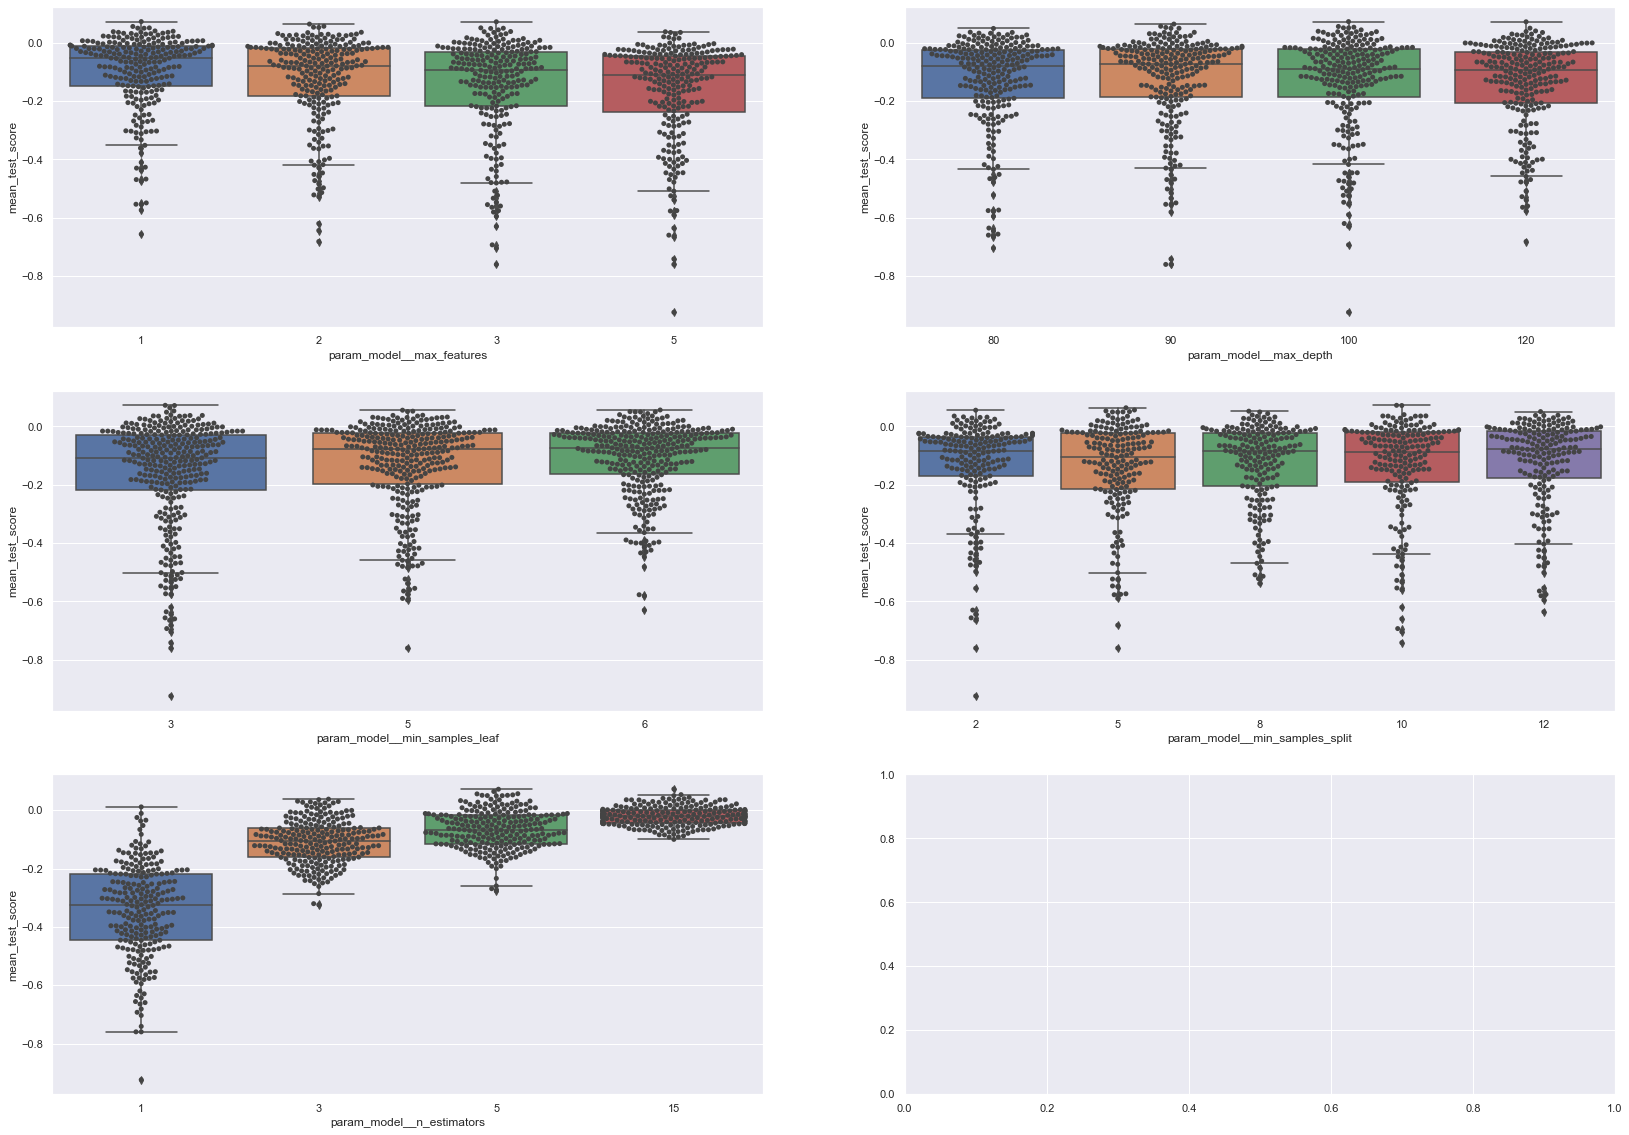

In [24]:
fig, ((ax_feats, ax_max_depth), (ax_samp_leaf, ax_samp_split), (ax_estimators, _)) = plt.subplots(3, 2, figsize=(28, 20))

def plot_feats(**kwargs):
    sns.boxplot(**kwargs)
    sns.swarmplot(**kwargs, color='#444')

plot_feats(data= rfdf, x = 'param_model__max_features', y = 'mean_test_score', ax=ax_feats)
plot_feats(data= rfdf, x = 'param_model__max_depth', y = 'mean_test_score', ax=ax_max_depth)
plot_feats(data= rfdf, x = 'param_model__min_samples_leaf', y = 'mean_test_score', ax=ax_samp_leaf)
plot_feats(data= rfdf, x = 'param_model__min_samples_split', y = 'mean_test_score', ax=ax_samp_split)
plot_feats(data= rfdf, x = 'param_model__n_estimators', y = 'mean_test_score', ax=ax_estimators)


0.12 is a great r2_score for our case but the standard deviation for the score accros folds is crazy (0.13), some folds are performing way better than others, which is weird and reminds me that our data is ordered and we ought to shuffle the dataset.

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.preprocessing import FunctionTransformer


pipe = Pipeline(steps=[
    ('shuffle', FunctionTransformer(shuffle, kw_args={'random_state':42})),
    ('scale', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators = 200))
])

parameters = [
    {
    'model__max_depth': [80, 90, 100, 120],
    'model__max_features': [1, 2, 3, 5],
    'model__min_samples_leaf': [3, 5, 6],
    'model__min_samples_split': [2, 5, 8, 10, 12],
    'model__n_estimators': [1,3, 5, 15],
    }
]

grid5 = GridSearchCV(pipe, parameters, cv=5, n_jobs=3, verbose=2)


grid5.fit(X_select, y)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('shuffle',
                                        FunctionTransformer(func=<function shuffle at 0x00000134739CF940>,
                                                            kw_args={'random_state': 42})),
                                       ('scale', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(n_estimators=200))]),
             n_jobs=3,
             param_grid=[{'model__max_depth': [80, 90, 100, 120],
                          'model__max_features': [1, 2, 3, 5],
                          'model__min_samples_leaf': [3, 5, 6],
                          'model__min_samples_split': [2, 5, 8, 10, 12],
                          'model__n_estimators': [1, 3, 5, 15]}],
             verbose=2)

In [26]:
pd.DataFrame(grid5.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
525,0.012001,0.002533,0.003199,0.000401,100,1,6,5,3,"{'model__max_depth': 100, 'model__max_features...",-0.219047,-0.162346,-0.104286,0.149476,0.013965,-0.064448,0.131897,1
533,0.014306,0.004894,0.003397,0.001019,100,1,6,10,3,"{'model__max_depth': 100, 'model__max_features...",-0.107316,-0.225565,-0.108013,0.007466,0.055106,-0.075664,0.098519,2
527,0.052104,0.009764,0.005400,0.001020,100,1,6,5,15,"{'model__max_depth': 100, 'model__max_features...",-0.233314,-0.182978,0.027732,0.034251,-0.040587,-0.078979,0.109834,3
282,0.029202,0.014455,0.004398,0.000799,90,1,6,2,5,"{'model__max_depth': 90, 'model__max_features'...",-0.112884,-0.256333,-0.006493,-0.019048,-0.010737,-0.081099,0.096005,4
55,0.045001,0.004732,0.011600,0.010092,80,1,6,10,15,"{'model__max_depth': 80, 'model__max_features'...",-0.168345,-0.167168,-0.065809,-0.075190,-0.014416,-0.098186,0.060457,5


The performance with the shuffled data is so terrible it must mean that either
*   The ordering introduced a significant bias
*   The shuffle did not run as expected and the results of the shuffle are invalid.
Since we cannot be sure how the pipeline executed the shuffle, we'll do it ourselves to see if there is any difference.

In [38]:
X_shuffle, y_shuffle = shuffle(X_select, y, random_state=42) 

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.preprocessing import FunctionTransformer


pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', RandomForestRegressor())
])

parameters = [
    {
    'model__max_depth': [80, 90, 100, 120],
    'model__max_features': [2, 3, 5, 9],
    'model__min_samples_leaf': [2, 3, 5, 6],
    'model__min_samples_split': [2, 5, 8, 10, 12],
    'model__n_estimators': [2, 3, 5, 15],
    }
]

grid6 = GridSearchCV(pipe, parameters, cv=5, n_jobs=3, verbose=2)



grid6.fit(X_shuffle, y_shuffle)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             n_jobs=3,
             param_grid=[{'model__max_depth': [80, 90, 100, 120],
                          'model__max_features': [2, 3, 5, 9],
                          'model__min_samples_leaf': [2, 3, 5, 6],
                          'model__min_samples_split': [2, 5, 8, 10, 12],
                          'model__n_estimators': [2, 3, 5, 15]}],
             verbose=2)

In [29]:
pd.DataFrame(grid6.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
750,0.023904,0.007285,0.003220,0.001937,100,3,3,8,5,"{'model__max_depth': 100, 'model__max_features...",0.022481,0.118821,-0.012363,0.218295,-0.146174,0.040212,0.123054,1
39,0.044399,0.005118,0.004800,0.001328,80,2,3,12,15,"{'model__max_depth': 80, 'model__max_features'...",0.143339,-0.192237,0.059549,0.091464,0.000726,0.020568,0.116016,2
359,0.042401,0.002578,0.004008,0.001097,90,2,3,12,15,"{'model__max_depth': 90, 'model__max_features'...",0.194474,-0.053118,-0.149031,0.061830,0.039807,0.018793,0.115320,3
466,0.016598,0.001855,0.003004,0.001095,90,3,6,5,5,"{'model__max_depth': 90, 'model__max_features'...",0.032824,0.023054,-0.040175,0.098063,-0.020287,0.018696,0.047965,4
1059,0.051404,0.009892,0.004399,0.000495,120,3,2,12,15,"{'model__max_depth': 120, 'model__max_features...",0.111265,-0.056989,-0.112950,0.090094,-0.001148,0.006054,0.085229,5


At first it looked like shufling the dataset has increased the accuracy and decreased the standard deviation. 

But, after I run it again turns out that the standard deviation decreassed a bit, but the score decreased by about 60% too, plus now the best test score can range from 0 to 0.14 dependending on the shuffle.

To be fair to the SVR we should give it a go with randomized data too.

In [30]:
pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', SVR())
])

parameters = [
    {
        'model__kernel':['rbf', 'poly'], 
        'model__gamma': ['auto', 'scale', 1, *np.logspace(-5, 2, base=10, num=12)] ,
        'model__C': np.logspace(-10, 3, base=10, num=12) ,
    }
]

grid7 = GridSearchCV(pipe, parameters, cv=5, verbose=3, n_jobs=3)

_ = grid7.fit(X_shuffle, y_shuffle)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [31]:
pd.DataFrame(grid7.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
115,0.010999,0.011588,0.001199,0.000399,3.51119e-07,5.3367,poly,"{'model__C': 3.5111917342151345e-07, 'model__g...",0.171488,0.193088,0.029226,-0.225329,0.037976,0.041290,0.149155,1
345,0.006966,0.006049,0.002808,0.002642,1000,0.00351119,poly,"{'model__C': 1000.0, 'model__gamma': 0.0035111...",0.172791,0.195236,0.033729,-0.232620,0.023504,0.038528,0.152548,2
259,0.007906,0.007085,0.001400,0.000489,0.284804,0.0657933,poly,"{'model__C': 0.2848035868435805, 'model__gamma...",0.165380,0.141456,0.011518,-0.212312,0.080240,0.037256,0.135697,3
155,0.006398,0.005848,0.002401,0.002870,8.11131e-05,1,poly,"{'model__C': 8.111308307896872e-05, 'model__ga...",0.165467,0.141502,0.011518,-0.212651,0.080361,0.037239,0.135852,4
29,0.003799,0.001166,0.001200,0.000400,1e-10,100,poly,"{'model__C': 1e-10, 'model__gamma': 100.0, 'mo...",0.164724,0.131310,-0.008654,-0.207457,0.098373,0.035659,0.134766,5


The shuffle seems to have increased the accuracy of the SVR, though it is still too low, and decrease teh standard deviation, which is great.

Another thing we could have problems with is the scaling, by no means is this data statistically normal, then again I don't know id it should be.

C:\Users\bonda\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bonda\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bonda\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bonda\AppData\Roaming\Python\Python

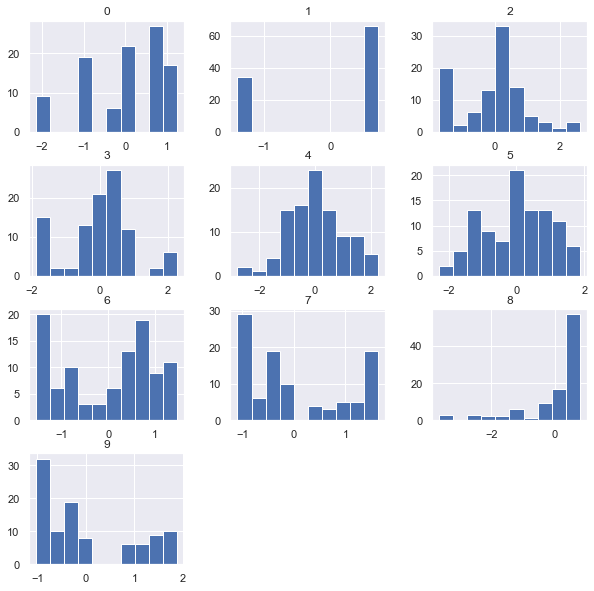

In [32]:
sdf = pd.DataFrame(StandardScaler().fit_transform(X_select, y))
_ = sdf.hist(figsize=(10,10))

I've heard that tree-based models don't need normalisation at all, except that removing it seems to hurt the model.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.preprocessing import FunctionTransformer


pipe = Pipeline(steps=[
    ('model', RandomForestRegressor())
])

parameters = [
    {
    'model__max_depth': [80, 90, 100, 120],
    'model__max_features': [2, 3, 5, 9],
    'model__min_samples_leaf': [2, 3, 5, 6],
    'model__min_samples_split': [2, 5, 8, 10, 12],
    'model__n_estimators': [2, 3, 5, 15],
    }
]

grid8 = GridSearchCV(pipe, parameters, cv=5, n_jobs=3, verbose=2)



grid8.fit(X_shuffle, y_shuffle)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', RandomForestRegressor())]),
             n_jobs=3,
             param_grid=[{'model__max_depth': [80, 90, 100, 120],
                          'model__max_features': [2, 3, 5, 9],
                          'model__min_samples_leaf': [2, 3, 5, 6],
                          'model__min_samples_split': [2, 5, 8, 10, 12],
                          'model__n_estimators': [2, 3, 5, 15]}],
             verbose=2)

In [36]:
pd.DataFrame(grid8.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
165,0.012000,0.003099,0.002201,0.000980,80,5,2,5,3,"{'model__max_depth': 80, 'model__max_features'...",0.202647,0.304698,-0.254152,0.032265,0.199180,0.096927,0.196081,1
858,0.018199,0.001328,0.001998,0.000632,100,5,5,12,5,"{'model__max_depth': 100, 'model__max_features...",0.204159,-0.069117,-0.037443,0.254240,0.031723,0.076712,0.129677,2
675,0.048407,0.004791,0.005394,0.002322,100,2,3,10,15,"{'model__max_depth': 100, 'model__max_features...",0.108578,-0.015269,-0.067283,0.019325,0.105604,0.030191,0.068582,3
1150,0.023905,0.005042,0.002999,0.001548,120,5,3,8,5,"{'model__max_depth': 120, 'model__max_features...",0.241851,-0.266029,-0.088419,0.142862,0.116387,0.029330,0.182612,4
370,0.019600,0.003199,0.006400,0.001625,90,2,5,8,5,"{'model__max_depth': 90, 'model__max_features'...",0.163709,-0.183693,0.082872,0.033893,0.013974,0.022151,0.115154,5


# Ranking

Now r2_score is not a good metric for this model to begin with.

An accurate prediction of the tip would be great, but given the nature of tips it may be impossible to predict well. Most importantly it may also be unnecessary. The goal of the project can be achieved by a model that succesfully ranks a number of future shifts from most to least proffitable or one that selects k most profitable shifts out of a list.

Now we will try to implement a ranking model and device a ranking-based scoring function for the models we have so far.

I could not find any models that are specialized in ranking, so we will focus on creating a better scoring function. 

In [237]:
def rank(values: np.ndarray):
    ranking = np.zeros(len(values)).astype(int)
    
    for val in range(len(values)):
        for rank in range(len(ranking)):
            if values[val] > values[rank]:
                ranking[rank] += 1

    return ranking

def weighted_ranking_score(y_true: pd.Series, y_pred: np.ndarray):
    length = len(y_true)
    true_rank = rank(y_true.values)
    pred_rank = rank(y_pred)

    residuals = abs(true_rank-pred_rank)

    weights = 1 - (true_rank/length)

    wres =  residuals * weights

    
    loss = wres.sum() / np.array(range(length)).sum()

    # print('loss is ', loss)
    # print(pd.DataFrame({'t': y_true, 'tr':true_rank, 'p':y_pred, 'pr':pred_rank, 'res': residuals, 'w':weights, 'wres':wres}))
    return 1 - loss
    
weighted_ranking_score(pd.Series([2,2,2,2,2]), pd.Series([1,2,3,4,5]))

0.0

In order to evaluate the performance of the model we need to compare its score with a benchmark.

Our goal is to create a model that is more accurate than humans. Since we do not have acces to actual predictions we will try to emulate some different behaviours.

If the driver choses the days at random their score is about 0.64

In [228]:
sum=0
for _ in range(0,700):
    sample_week = df.sample(7).reset_index()['TipPerOrder']
    sum += weighted_ranking_score(sample_week, sample_week.sample(frac=1).values)
print(sum/700)

0.6435665694849372


If a driver tries to chooses days that are later in the week, their score is about 0.55.

In [236]:
sum = 0
for _ in range(0,700):
    sample_week = df.sample(7).reset_index().sort_values('DayOfWeek')['TipPerOrder']

    sum += weighted_ranking_score(sample_week, np.linspace(0,1,7))
print(sum/700)

0.5581341107871717


With these results we decide that models performing better than 0.64 are considered more performant than humans.

Now we will implement this new score to find the best model.

In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer


pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', RandomForestRegressor()),
])

parameters = [
    {
    'model__max_depth': [80, 90, 100, 120],
    'model__max_features': [2, 3, 5, 9],
    'model__min_samples_leaf': [2, 3, 5, 6],
    'model__min_samples_split': [2, 5, 8, 10, 12],
    'model__n_estimators': [2, 3, 5, 15],
    }
]

grid9a = GridSearchCV(pipe, parameters, cv=5, n_jobs=3, verbose=1, scoring=make_scorer(weighted_ranking_score))



grid9a.fit(X_shuffle, y_shuffle)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             n_jobs=3,
             param_grid=[{'model__max_depth': [80, 90, 100, 120],
                          'model__max_features': [2, 3, 5, 9],
                          'model__min_samples_leaf': [2, 3, 5, 6],
                          'model__min_samples_split': [2, 5, 8, 10, 12],
                          'model__n_estimators': [2, 3, 5, 15]}],
             scoring=make_scorer(weighted_ranking_score), verbose=1)

In [242]:
pd.DataFrame(grid9a.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
889,0.007799,0.001471,0.001205,0.000399,100,9,2,8,3,"{'model__max_depth': 100, 'model__max_features...",0.720789,0.753421,0.627632,0.742895,0.722632,0.713474,0.044649,1
906,0.014797,0.003867,0.002608,0.001207,100,9,3,5,5,"{'model__max_depth': 100, 'model__max_features...",0.708421,0.676579,0.658158,0.781579,0.724737,0.709895,0.042773,2
402,0.034404,0.013099,0.002603,0.000493,90,3,2,2,5,"{'model__max_depth': 90, 'model__max_features'...",0.718421,0.732632,0.586579,0.776842,0.716053,0.706105,0.063631,3
1138,0.011201,0.002788,0.003798,0.001167,120,5,2,12,5,"{'model__max_depth': 120, 'model__max_features...",0.784474,0.665000,0.636316,0.710789,0.698684,0.699053,0.050060,4
508,0.009998,0.002100,0.002600,0.001743,90,5,3,8,2,"{'model__max_depth': 90, 'model__max_features'...",0.720263,0.680526,0.599474,0.784211,0.707105,0.698316,0.060038,5


No we see a model with an accuracy of 0.71 nad standard deviation of 0.4 which is pretty good. 

I only worry because all these random forest have few estimators, low min sample leaves and big max depth. These may indicate that the Random forest could be overfitting.

In either cacse let's try again other models that we have seen before.

In [247]:
pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', SVR())
])

parameters = [
    {
        'model__kernel':['rbf', 'poly'], 
        'model__gamma': ['auto', 'scale', 1, *np.logspace(-6, 2, base=10, num=14)] ,
        'model__C': np.logspace(-11, 3, base=10, num=14) ,
    }
]

grid9b = GridSearchCV(pipe, parameters, cv=5, n_jobs= 3, scoring=make_scorer(weighted_ranking_score), verbose=1)

grid9b.fit(X_shuffle, y_shuffle)

Fitting 5 folds for each of 476 candidates, totalling 2380 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=3,
             param_grid=[{'model__C': array([1.00000000e-11, 1.19377664e-10, 1.42510267e-09, 1.70125428e-08,
       2.03091762e-07, 2.42446202e-06, 2.89426612e-05, 3.45510729e-04,
       4.12462638e-03, 4.92388263e-02, 5.87801607e-01, 7.01703829e+00,
       8.37677640e+01, 1.00000000e+03]),
                          'model__g...1, 1e-06,
                                           4.124626382901348e-06,
                                           1.7012542798525893e-05,
                                           7.017038286703837e-05,
                                           0.0002894266124716752,
                                           0.001193776641714437,
                                           0.004923882631706742,
                                           0.02030917620904739,
                                

In [248]:
pd.DataFrame(grid9b.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
181,0.006408,0.006827,0.001794,0.001170,2.42446e-06,1.70125e-05,poly,"{'model__C': 2.4244620170823257e-06, 'model__g...",0.681579,0.648421,0.699211,0.805789,0.704211,0.707842,0.052729,1
17,0.005199,0.005419,0.002406,0.001028,1e-11,0.00119378,poly,"{'model__C': 1e-11, 'model__gamma': 0.00119377...",0.681842,0.668947,0.656316,0.783158,0.687632,0.695579,0.045106,2
247,0.003402,0.001347,0.001394,0.000802,0.000345511,4.12463e-06,poly,"{'model__C': 0.0003455107294592218, 'model__ga...",0.685526,0.661579,0.643158,0.777105,0.695263,0.692526,0.046054,3
99,0.002200,0.000750,0.001000,0.000895,1.4251e-09,24.2446,poly,"{'model__C': 1.4251026703029963e-09, 'model__g...",0.707895,0.682368,0.597632,0.775526,0.675789,0.687842,0.057278,4
395,0.003005,0.001262,0.001203,0.000387,7.01704,0.0203092,poly,"{'model__C': 7.017038286703808, 'model__gamma'...",0.707632,0.698421,0.593158,0.751579,0.687368,0.687632,0.052021,5


SVR seems to be performing almost as good as RF with the new metric. 

I wonder if we should try to reduce the number of features.

In [290]:
pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', SVR())
])

X_small, y_small = shuffle(pdf[['IsWeekend','MaxHum', 'MaxWindHour']].values, y, random_state=42) 

parameters = [
    {
        'model__kernel':['rbf', 'poly'], 
        'model__gamma': ['auto', 'scale',1e-4, 1.5e-4, 0.001, 0.01, 0.05, 0.1, 1,] , #'auto', 'scale', 1, *np.logspace(-1, 1, base=10, num=3)
        'model__C': [0.01, 0.1, 0.25, 0.5, 0.75, 1, 3, 5, 10] , #np.logspace(-1, 1, base=10, num=3)
    }
]

grid10a = GridSearchCV(pipe, parameters, cv=5, n_jobs= 3, scoring=make_scorer(weighted_ranking_score), verbose=1)

grid10a.fit(X_small, y_small)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=3,
             param_grid=[{'model__C': [0.01, 0.1, 0.25, 0.5, 0.75, 1, 3, 5, 10],
                          'model__gamma': ['auto', 'scale', 0.0001, 0.00015,
                                           0.001, 0.01, 0.05, 0.1, 1],
                          'model__kernel': ['rbf', 'poly']}],
             scoring=make_scorer(weighted_ranking_score), verbose=1)

In [291]:
pd.DataFrame(grid10a.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
65,0.002604,0.000492,0.001196,0.000402,0.5,0.01,poly,"{'model__C': 0.5, 'model__gamma': 0.01, 'model...",0.675000,0.655,0.676053,0.765789,0.719737,0.698316,0.039817,1
81,0.003200,0.001468,0.001406,0.000485,0.75,0.001,poly,"{'model__C': 0.75, 'model__gamma': 0.001, 'mod...",0.663421,0.655,0.676053,0.765789,0.719737,0.696000,0.041411,2
45,0.002801,0.000401,0.001200,0.000401,0.25,0.001,poly,"{'model__C': 0.25, 'model__gamma': 0.001, 'mod...",0.663421,0.655,0.676053,0.765789,0.719737,0.696000,0.041411,2
131,0.002400,0.000491,0.001199,0.000400,5,0.0001,poly,"{'model__C': 5, 'model__gamma': 0.0001, 'model...",0.663421,0.655,0.676053,0.765789,0.719737,0.696000,0.041411,2
25,0.002601,0.000489,0.001199,0.000400,0.1,0.00015,poly,"{'model__C': 0.1, 'model__gamma': 0.00015, 'mo...",0.663421,0.655,0.676053,0.765789,0.719737,0.696000,0.041411,2


It is interesting that a result almost as good can be achieved with a simple SVR with just three features.

In that case it is probably not worth adding more of the already existing features. Instead we would rather try to find other features.